# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Usual imports
import matplotlib.pyplot as plt
from scipy.misc import toimage
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Visualizations will be shown in the notebook.
%matplotlib inline

# Load pickled data
import pickle

# Import Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# Load class descriptions
signnames = pd.read_csv("signnames.csv")

print("Data loaded...")

Using TensorFlow backend.


Data loaded...


In [4]:
def extract(from_X, from_y, old_id, new_id):
    idx = np.where(from_y == old_id)
    x = from_X[idx]
    y = np.empty(len(x))
    y.fill(new_id)
    
    y = y.astype(int)
    

    return x, y

In [5]:
# extract stop signs
X_train_stop, y_train_stop = extract(X_train, y_train, 14, 0)
X_train_keep_right, y_train_keep_right = extract(X_train, y_train, 33, 1)
X_train_keep_left, y_train_keep_left = extract(X_train, y_train, 34, 2)

print(len(X_train_stop))
print(len(y_train_stop))

print(len(X_train_keep_right))
print(len(y_train_keep_right))

print(len(X_train_keep_left))
print(len(y_train_keep_left))

X = []
X.extend(X_train_stop)
X.extend(X_train_keep_right)
X.extend(X_train_keep_left)
X = np.asarray(X)


y = []
y.extend(y_train_stop)
y.extend(y_train_keep_right)
y.extend(y_train_keep_left)
y = np.asarray(y)

print(len(X))
print(len(y))


a = {'features': X, 'labels': y}

with open('new_train.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

print('Done')

with open('new_train.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(len(b['features']))
print(len(b['labels']))

780
780
689
689
420
420
1889
1889
Done
1889
1889


In [6]:
# extract stop signs
X_train_stop, y_train_stop = extract(X_test, y_test, 14, 0)
X_train_keep_right, y_train_keep_right = extract(X_test, y_test, 33, 1)
X_train_keep_left, y_train_keep_left = extract(X_test, y_test, 34, 2)

print(len(X_train_stop))
print(len(y_train_stop))

print(len(X_train_keep_right))
print(len(y_train_keep_right))

print(len(X_train_keep_left))
print(len(y_train_keep_left))

X = []
X.extend(X_train_stop)
X.extend(X_train_keep_right)
X.extend(X_train_keep_left)
X = np.asarray(X)

y = []
y.extend(y_train_stop)
y.extend(y_train_keep_right)
y.extend(y_train_keep_left)
y = np.asarray(y)

print(len(X))
print(len(y))


a = {'features': X, 'labels': y}

with open('new_test.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

print('Done')

with open('new_test.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(len(b['features']))
print(len(b['labels']))

270
270
210
210
120
120
600
600
Done
600
600


In [8]:
# extract stop signs
idx = np.where(y_train == 14)
X_train_stop = X_train[idx]
y_train_stop = np.empty(len(X_train_stop))
y_train_stop.fill(0)
print(len(X_train_stop))

# extract keep-right
idx = np.where(y_train == 33)
X_train_keep_right = X_train[idx]
y_train_keep_right = np.empty(len(X_train_keep_right))
y_train_keep_right.fill(1)
print(len(X_train_keep_right))

# extract keep-left
idx = np.where(y_train == 34)
X_train_keep_left = X_train[idx]
y_train_keep_left = np.empty(len(X_train_keep_left))
y_train_keep_left.fill(2)
print(len(X_train_keep_left))

X = []
X.extend(X_train_stop)
X.extend(X_train_keep_right)
X.extend(X_train_keep_left)

y = []
y.extend(y_train_stop)
y.extend(y_train_keep_right)
y.extend(y_train_keep_left)

print(len(X))
print(len(y))
print

780
689
420
1889
1889


<function print>

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [6]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


In [3]:
idx = np.where(y_train == 14)
X_train = X_train[idx]
y_train = y_train[idx]

idx = np.where(y_test == 14)
X_test = X_test[idx]
y_test = y_test[idx]

n_train = len(X_train)
n_test = len(X_test)
n_classes = 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 780
Number of testing examples = 270
Image data shape = (39209, 32, 32, 3)
Number of classes = 1


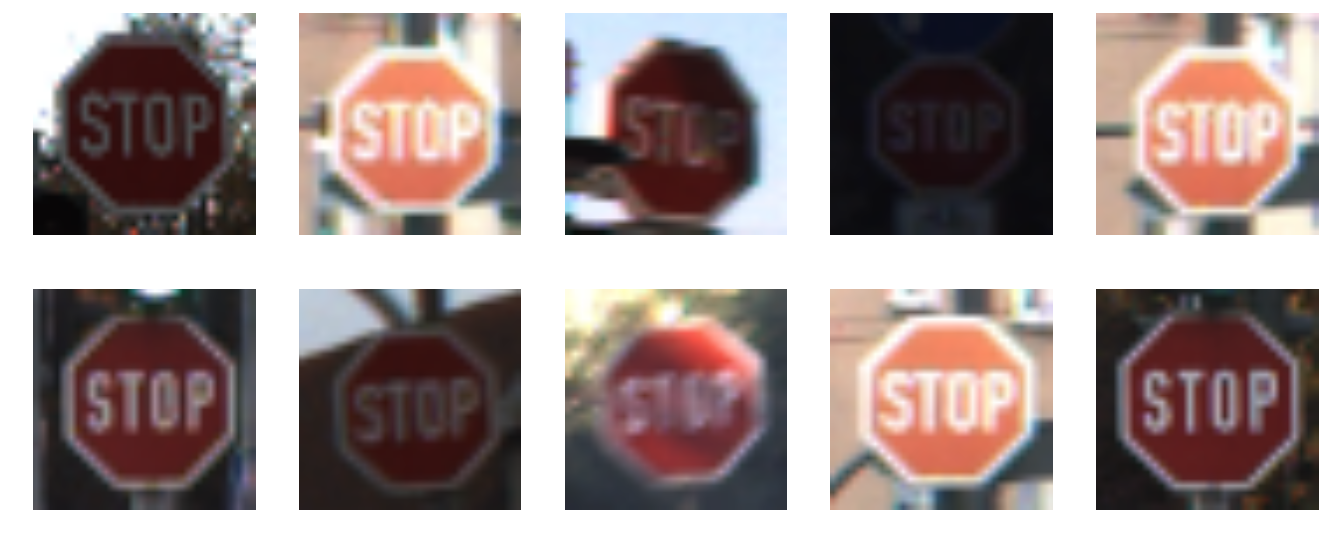

In [4]:
# show an image from each class in a grid
plt.subplots(figsize=(20, 35))
row = 1
col = 1
for i in range(10):
    plt.subplot2grid((10, 6), (row, col)) # we really need 9 x 5 = 45 to cover 43 images. Keep one extra each
    plt.imshow(toimage(X_test[i+100]))
    plt.axis("off")
    
    col += 1
    if(col > 5): 
        col = 1
        row += 1

In [5]:
# Display SignNames (class descriptions)
display(signnames)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [6]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from scipy.misc import toimage

# Visualizations will be shown in the notebook.
%matplotlib inline

Let us visualize dataset by plotting an image from each class.

Let us plot histogram of training labels to visualize if there are any imbalances in class distribution

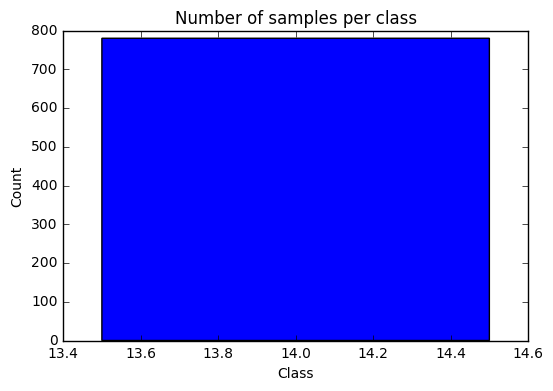

In [7]:
def show_samples_distribution():
    plt.hist(y_train, n_classes)
    plt.title('Number of samples per class')
    plt.xlabel('Class')
    plt.ylabel('Count')
    _ =  plt.show()
    
show_samples_distribution()

There is too much difference between the classes. We are going to create some data to balance the number of inputs and reduce the probable bias the network could have towards some classes. It will also help us give more data to our network.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

print('Generating additional data...')

# samples_per_class = np.bincount(y_train)
# angles = [-3, 3, -5, 5, -10, 10, -15, 15, -20, 20]

# image_cols = X_train.shape[1] # 32 x 32 image
# image_rows = X_train.shape[2]

# rotated_images = []
# rotated_labels = []

# # use openCV to rotate images of classes that have few samples

# samples_count_in_max_class = max(samples_per_class)
# for class_id in range(n_classes):
#     samples_count_in_this_class = samples_per_class[class_id]
#     shortfall = samples_count_in_max_class - samples_count_in_this_class
    
#     image_ids_in_this_class = np.where(y_train == class_id)[0]
#     for image_id in image_ids_in_this_class:
#         for angle in angles:
#             source_image = X_train[image_id]
#             rotation_matrix = cv2.getRotationMatrix2D((image_cols/2, image_rows/2), angle, 1)
#             rotated_image = cv2.warpAffine(source_image, rotation_matrix, (image_cols, image_rows))
            
#             rotated_images.append(rotated_image)
#             rotated_labels.append(class_id)
            
#             shortfall -= 1
#             if(shortfall <= 0): break
#             # plt.imshow(toimage(source_image))
#             # plt.imshow(toimage(rotated_image))
#         if(shortfall <= 0): break

# print ("Finished rotating images")

# # Concatenate generated data with loaded dataset
# X_train = np.append(X_train, rotated_images, axis=0)
# y_train = np.append(y_train, rotated_labels, axis=0)

# histogram with augumented data
# show_samples_distribution()

# Normalize features from 0-255 to 0.0-1.0
X_train = X_train / 255.0
X_test = X_test / 255.0
print ("Finished normalizing images")

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print ("Finished one hot encoding labels")

# Get randomized datasets for training and validation
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(
   X_train,
   y_train,
   test_size=0.2,
   random_state=7
)
print('Finished randomizing and splitting dataset into train and validation')

Generating additional data...
Finished normalizing images
Finished one hot encoding labels
Finished randomizing and splitting dataset into train and validation


In [13]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

print(y_train.shape)
print(y_validation.shape)
print(y_test.shape)

print(y_test[0])

(624, 32, 32, 3)
(156, 32, 32, 3)
(270, 32, 32, 3)
(624, 15)
(156, 15)
(270, 15)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


Ah! The data looks more balanced now. Let us use it to train our Neural Network Classifier.

## Convolutional Neural Network to classify Traffic Signs

We will use a structure with two convolutional layers followed by max pooling and a flattening out of the network to fully connected layers to make predictions.

Our baseline network structure can be summarized as follows:
- Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
- Dropout set to 20%.
- Convolutional layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
- Max Pool layer with size 2×2.
- Flatten layer.
- Fully connected layer with 512 units and a rectifier activation function.
- Dropout set to 50%.

Fully connected output layer with 43 units and a softmax activation function.

A logarithmic loss function is used with the stochastic gradient descent optimization algorithm configured with a large momentum and weight decay start with a learning rate of 0.01.

In [12]:
# Create the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 32, 3)     9248        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 32, 32, 3)     0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 32, 3)     9248        dropout_1[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 16, 1)     0           convolution2d_2[0][0]            
___________________________________________________________________________________________

We can fit this model with 25 epochs and a batch size of 32.

Once the model is fit, we evaluate it on the test dataset and print out the classification accuracy.

In [13]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), nb_epoch=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Exception: Error when checking model target: expected dense_2 to have shape (None, 1) but got array with shape (624, 15)

We can use the data collected in the history object to create plots.

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])


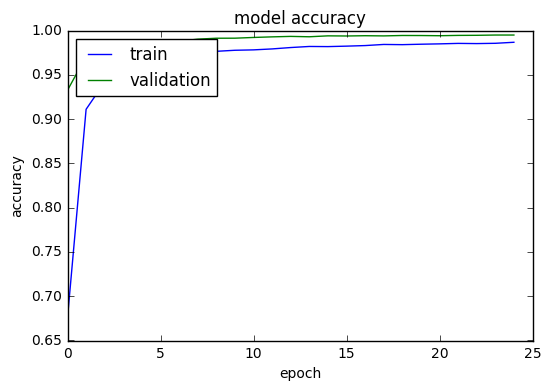

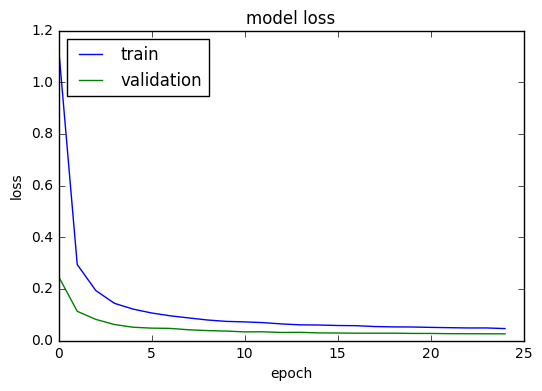

In [10]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Keras separates the concerns of saving your model architecture and saving your model weights.

Model weights are saved to HDF5 format. This is a grid format that is ideal for storing multi-dimensional arrays of numbers.

The model structure can be described and saved using two different formats: JSON and YAML.

In [11]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
loaded_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

predictions = loaded_model.predict(X_test)

Loaded model from disk
Accuracy: 91.28%


In [13]:
import random

# show couple of random images from the given set
def plot_examples(preds, features, labels, show_errors=False):
    
    # reverse one hot encoding
    predicted_labels = np.argmax(np.round(preds), axis=1)
    known_labels = np.argmax(labels, axis=1)
    
    # compare model predictions with known labels
    result = (predicted_labels == known_labels)

    indices = [i for i, x in enumerate(result) if x == (not show_errors)]

    # show an image from each class in a grid
    plt.subplots(figsize=(20, 35))
    for i in range(5):
        
        image_id = random.choice(indices)
        # image_id = indices[i]
        
        plt.subplot(150 + 1 + i)
        plt.imshow(toimage(features[image_id]))
        
        label_id = predicted_labels[image_id]
        predicted_title = signnames['SignName'][label_id]
        
        label_id = known_labels[image_id]
        known_title = signnames['SignName'][label_id]

        plt.title("P: {}".format(predicted_title))
        plt.xlabel("C: {}".format(known_title))

### Examples of correct predictions:

Let us look at couple of images for which our model got correct Predictions. 

Text on the top of the images are the predicted labels, whereas text at the bottom of the imgaes are the true known labels.

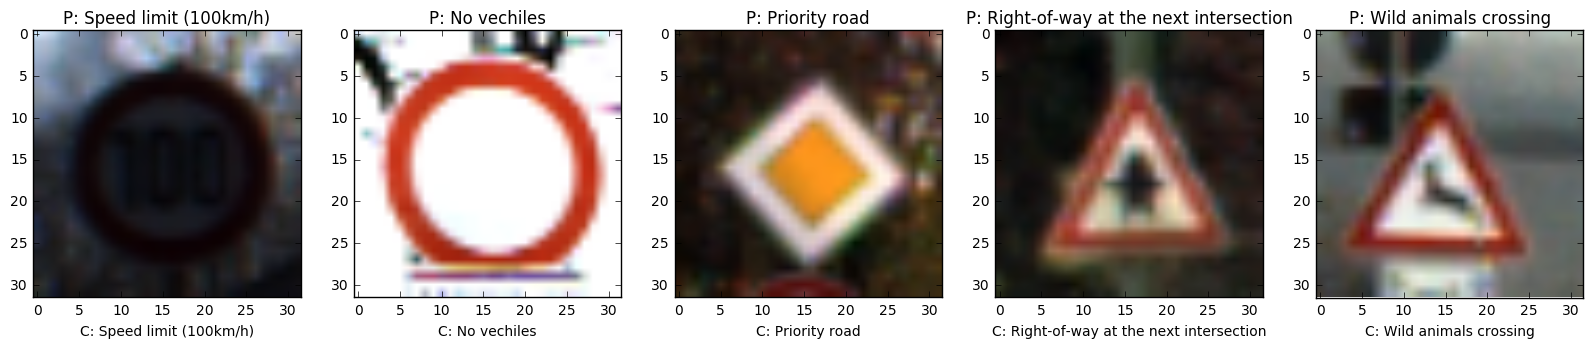

In [14]:
plot_examples(predictions, X_test, y_test, False)

### Examples of wrong predictions:

Let us also look at couple of images for which our model got predictions wrong.

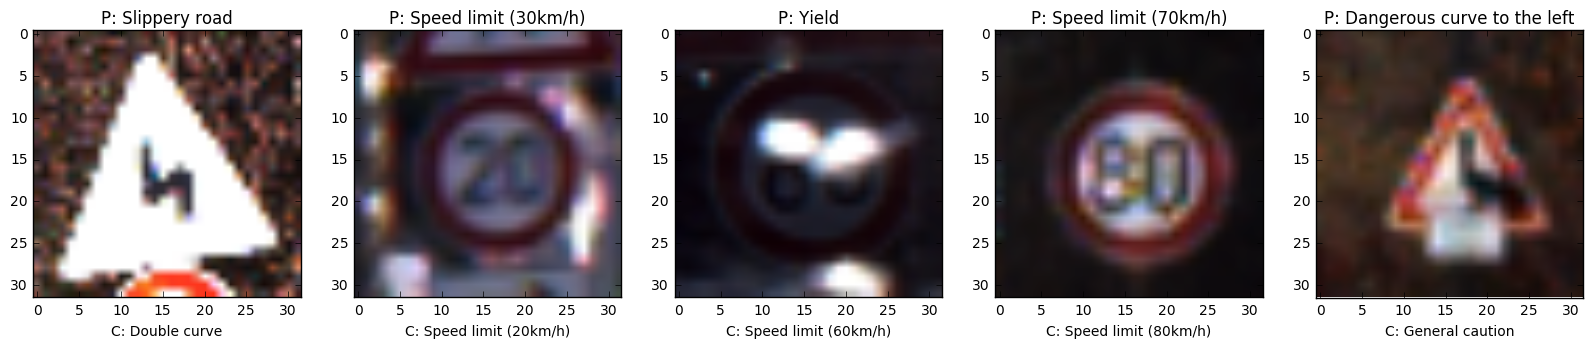

In [15]:
plot_examples(predictions, X_test, y_test, True)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I did some Exploratory Data Analysis before commencing. I plotted one image from each class to see what's in the dataset. I also loaded signnames.csv to understand the description of each class. Then I plotted histogram of the  image samples by class. I noticed that many of the classes were under represented, which can cause poor performance of the Neural Net. 

So I generated additional images in under represented classes by rotating images by small angles. OpenCV has a function, which does this with ease. Another plot of histogram shows that post-generation we have equal number of images in each class.

Then I normalized the values in images(features) from 0-255 to 0.0-1.0 so that variance in the data is low.

I then one-hot encoded the labels, because Neural Net model works well with this format for labels.

Finally, used sklearn's *train_test_split* function to randomize data and split dataset into training and validation set.

That's it. Our data is preprocessed and ready for ingestion into NN.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I used sklearn's *train_test_split* function to randomize data and split dataset into training and validation set. I kept aside 20% of the training data for validations. I used test data only for final accuracy reporting of the model.


During  Exploratory Data Analysis, I plotted histogram of the image samples by class. I noticed that many of the classes were under represented, which can cause poor performance of the Neural Net. So I generated additional images in under represented classes by rotating images by small angles. OpenCV has a function, which does this with ease. Another plot of histogram shows that post-generation we have equal number of images in each class.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My Neural Network has two convolutional layers followed by max pooling and a flattening out of the network to fully connected layers to make predictions.

Network's structure can be summarized as follows:

- Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
- Dropout set to 20%.
- Convolutional layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
- Max Pool layer with size 2×2.
- Flatten layer.
- Fully connected layer with 512 units and a rectifier activation function.
- Dropout set to 50%.

Fully connected output layer with 43 units and a softmax activation function.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

To train the network, I used the logarithmic loss function with the stochastic gradient descent optimization algorithm configured with a large momentum and weight decay start with a learning rate of 0.01.

After many tests, and trial and errors, following parameters were used:

- epochs = 25
- lrate = 0.01
- decay = lrate/epochs
- momentum = 0.9
- batch_size = 32

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Oh man! Where to begin. This project was full of trials and errors. I was playing with legos of Convolution blocks, Max Pooling blocks and Fully connected blocks.

I started small with few layers and nodes, and slowly built upon it. After some time, adding more convolution layers did not improve results, but increased computation time by a lot. So I scaled back. Besides, Traffic Sign images have low statistical invariance, so too many convolutions steps does not help.

In the end, I settled for a mid size architecture.

I did not use more than 25 epochs because validation accuracy was not improving after that.

Not to mention that I wanted to keep my AWS cost to minimum, so I called 92% test accuracy a success. Moreover, at this accuracy, model was able to correctly predict 5/6 images downloaded from internet. So, I was pretty happy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Prediction Confidence for respective images:
[99.000000953674316, 100.0, 100.0, 99.000000953674316, 100.0, 100.0]


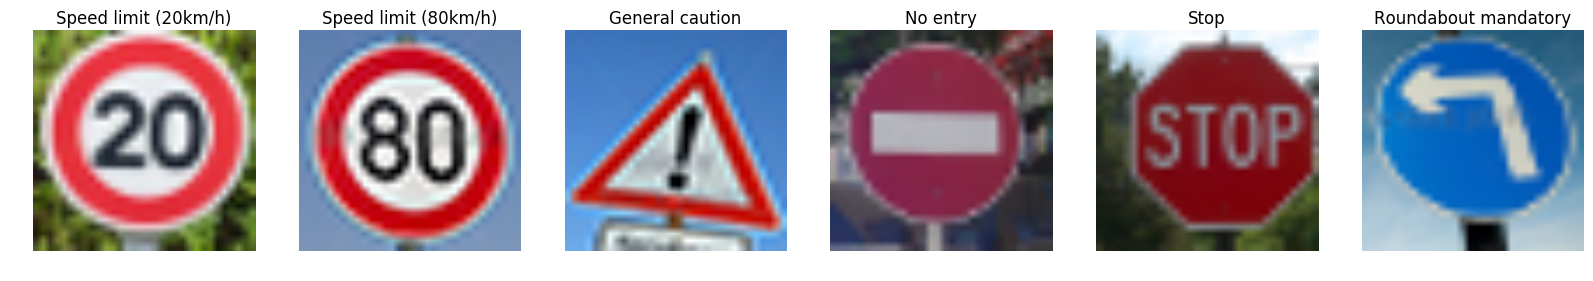

In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from os import listdir
import matplotlib.image as mpimg

images_folder = "images/"
new_images = []

# load new images from a folder
images = listdir(images_folder)
for image in images:
    img = mpimg.imread(images_folder + image)
    new_images.append(img)
    
# convert to numpy array, expected input type of the model
new_images = np.asarray(new_images)

# make predictions from the previously trained model
new_predictions = loaded_model.predict(new_images)

print("Prediction Confidence for respective images:")
print([max(i)*100 for i in np.round(new_predictions, 2)])

# reverse one hot encoding
new_label_ids = np.argmax(np.round(new_predictions), axis=1)

plt.subplots(figsize=(20, 35))

# plot new images with predicted labels on the top
for i, new_label_id in enumerate(new_label_ids):
    predicted_title = signnames['SignName'][new_label_id]
    plt.subplot(160 + 1 + i)
    plt.imshow(new_images[i])
    plt.axis("off")
    plt.title(predicted_title)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I downloaed the above 6 images from the internet. Then used GIMP to crop and scale images to desired 32x32 size. I then fed these new images to the previously trained model. The predictions for each image is shown on the top of the images. 

Most of the images that I found were copy right protected. These images are of very bad quality (pixelated), and would make classification not easy for the model. I also noticed that the one image that my model got wrong, has background and foreground color pretty similar. Could this have caused an issue in our small-ish network?

In the end, 5/6 images were correctly classified. So it looks like we trained our network well :)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Model correctly classified 5 out of 6 internet images. Thus resulting in 83.33% accuracy. I have plotted all the internet images above with predicted class labels on the top.

I'm not quite sure, why it got the 6th image wrong. I also noticed that this image has background and foreground color pretty similar. Not a huge contrast for the sign to standout. Could this have caused an issue in our small-ish network?

Model generalizes well with the data from the dataset. Correctly recognizing 5 images from the internet is nothing short of a magic to me. :) 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Following is the Prediction Confidence for each internet images:
[73.000001907348633, 100.0, 97.000002861022949, 100.0, 100.0, 100.0]

Model correctly classified 5 out of 6 images. The model is pretty certain of all the images that it got correct. For "Speed limit (80km/hr)", "No Entry",  and "Stop"  it was 100% certain. For other two, "Speed limit (20km/hr)" and "General caution", model's certainity was less than 100%, but still highest.

The last image - "Left Turn", is most perplexing output. Model is 100% sure that it is a "Roundabout" sign, which is 100% wrong! I'm not quite sure, how to explain this. Time permitting I intend to investigate this further with bigger networks.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.